In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

2025-06-09 23:56:43.691460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 23:56:47.923545: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-09 23:56:49.727191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749513412.729685    2150 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749513413.588639    2150 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749513420.932457    2150 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
filename = "Trading with Mexico.txt"
raw_text = open(filename, "r", encoding="utf-8").read()
raw_text = raw_text.lower()  # Convert to lowercase
print(raw_text[0:1000])


the project gutenberg ebook of trading with mexico
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: trading with mexico

author: wallace thompson

release date: february 26, 2025 [ebook #75469]

language: english

original publication: new york: dodd, mead and company, 1921

credits: the online distributed proofreading team at https://www.pgdp.net (this file was produced from images generously made available by the internet archive)


*** start of the project gutenberg ebook trading with mexico ***





                              trading with
                                 mexico



In [3]:
raw_text = ''.join(c for c in raw_text if not c.isdigit())
chars = sorted(list(set(raw_text)))

In [4]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [5]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  387017
Total Vocab:  62


In [6]:
seq_length = 60
step = 10
sentences = []
next_chars = []

for i in range(0, n_chars - seq_length, step):
    sentences.append(raw_text[i: i+ seq_length])
    next_chars.append(raw_text[i + seq_length])

    n_patterns = len(sentences)
    print('Number of sequences:', n_patterns)

Number of sequences: 1
Number of sequences: 2
Number of sequences: 3
Number of sequences: 4
Number of sequences: 5
Number of sequences: 6
Number of sequences: 7
Number of sequences: 8
Number of sequences: 9
Number of sequences: 10
Number of sequences: 11
Number of sequences: 12
Number of sequences: 13
Number of sequences: 14
Number of sequences: 15
Number of sequences: 16
Number of sequences: 17
Number of sequences: 18
Number of sequences: 19
Number of sequences: 20
Number of sequences: 21
Number of sequences: 22
Number of sequences: 23
Number of sequences: 24
Number of sequences: 25
Number of sequences: 26
Number of sequences: 27
Number of sequences: 28
Number of sequences: 29
Number of sequences: 30
Number of sequences: 31
Number of sequences: 32
Number of sequences: 33
Number of sequences: 34
Number of sequences: 35
Number of sequences: 36
Number of sequences: 37
Number of sequences: 38
Number of sequences: 39
Number of sequences: 40
Number of sequences: 41
Number of sequences: 42
N

2094
Number of sequences: 2095
Number of sequences: 2096
Number of sequences: 2097
Number of sequences: 2098
Number of sequences: 2099
Number of sequences: 2100
Number of sequences: 2101
Number of sequences: 2102
Number of sequences: 2103
Number of sequences: 2104
Number of sequences: 2105
Number of sequences: 2106
Number of sequences: 2107
Number of sequences: 2108
Number of sequences: 2109
Number of sequences: 2110
Number of sequences: 2111
Number of sequences: 2112
Number of sequences: 2113
Number of sequences: 2114
Number of sequences: 2115
Number of sequences: 2116
Number of sequences: 2117
Number of sequences: 2118
Number of sequences: 2119
Number of sequences: 2120
Number of sequences: 2121
Number of sequences: 2122
Number of sequences: 2123
Number of sequences: 2124
Number of sequences: 2125
Number of sequences: 2126
Number of sequences: 2127
Number of sequences: 2128
Number of sequences: 2129
Number of sequences: 2130
Number of sequences: 2131
Number of sequences: 2132
Number 

In [7]:
import numpy as np
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool_)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)
print(y[0:10])
        

(38696, 60, 62)
(38696, 62)
[[False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
   True False False False False False False False Fals

In [8]:

from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

2025-06-09 23:57:30.990999: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        97,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,790 (413.24 KB)

 Trainable params: 105,790 (413.24 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.callbacks import ModelCheckpoint
filepath = "saved_weights-{epoch:02d}-{loss:.4}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min' )
callback_list = [checkpoint]

In [10]:
history = model.fit(x, y, 
                    batch_size=128,
                    epochs=50,
                    callbacks=callback_list)
model.save('my_saved_weights_50epochs.keras')

Epoch 1/50


2025-06-09 23:57:31.965063: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 143949120 exceeds 10% of free system memory.


303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 2.7871
Epoch 1: loss improved from inf to 2.47306, saving model to saved_weights-01-2.473.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step - loss: 2.7861
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 2.0542
Epoch 2: loss improved from 2.47306 to 2.01472, saving model to saved_weights-02-2.015.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 45s 148ms/step - loss: 2.0541
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 1.8579
Epoch 3: loss improved from 2.01472 to 1.83187, saving model to saved_weights-03-1.832.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 71s 112ms/step - loss: 1.8578
Epoch 4/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 1.6941
Epoch 4: loss improved from 1.83187 to 1.69398, saving model to saved_weights-04-1.694.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 33s 109ms/step - loss: 1.6941
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.5817
Epoch 5: loss improved from 1.69398 to 1.58539, saving model t

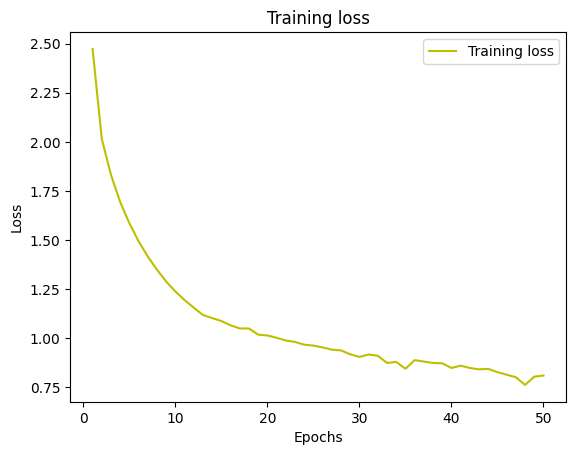

In [11]:
from matplotlib import pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)  # Exponentiation of log values
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [26]:
filename = "saved_weights-50-0.7706.keras"
model.load_weights("saved_weights-07-1.416.keras")

start_index = random.randint(0, n_chars - seq_length - 1)
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('---------- Seed for our text prediction: "'+ sentence + '"')
sys.stdout.write(generated)

---------- Seed for our text prediction: "started the paper money orgy. in the course
of three years h"
started the paper money orgy. in the course
of three years h

60

In [27]:
for i in range(400):  # Number of characters including sp
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()



ave
gneal mandate. to the be
inep by the powstion wus  solve have to the jolitics lead rigal of elonathed unsered who caten
man worth and
the finances
aregr laterated cy by the hech an exiofy by attitaten although the faiths of part,
from coon of
mexicans. the crugnists under husfredted fibsing stall hover, and engleponger out edects of mining to threating
the amait insuredtt of suces of enter has
